In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset= load_breast_cancer()
X_features= dataset.data
y_label= dataset.target

cancer_df= pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head()

In [ ]:
cancer_df.target.value_counts()

In [ ]:
cancer_df.info()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2, random_state= 156)
print(X_train.shape,X_test.shape)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    confusion= confusion_matrix(y_test,pred)
    accuracy= accuracy_score(y_test,pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬 >> \n',confusion)
    print('정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, F1: {:.4f}, \
    AUC:{:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:

# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier( n_estimators=400, learning_rate=0.1, max_depth=3) # 객체생성
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_set=evals, eval_metric='logloss',verbose=True) # verbose: 진행상황 보이기
ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test,ws100_preds,ws100_preds_proba)

In [ ]:
# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400,
                eval_set=evals, eval_metric='logloss',verbose=True) # verbose: 진행상황 보이기
ws400_preds = xgb_wrapper.predict(X_test)
ws400_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test,ws400_preds,ws400_preds_proba)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax)

In [ ]:
import lightgbm 
print(lightgbm.__version__)

In [ ]:
from lightgbm import LGBMClassifier
dataset = load_breast_cancer()
ftr= dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target,
                                                   test_size=0.2, 
                                                    random_state= 156)

lgbm_wrapper= LGBMClassifier(n_estimators=400)
evals= [(X_test,y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_metric= 'logloss',eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
preds_proba= lgbm_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test,preds,preds_proba)

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper)

In [ ]:
[과제]
캐글 산탄데르 고객 만족 예측 
Q. 산탄테르 은행의 고객만족 예측 분석을 수행하세요.
- 370개의 피처로 주어진 데이터 세트
- 클래스 레이블명은 target 1이 불만, 0은 만족 
- 모델의 성능 평가는 ROC_AUC
- 


In [ ]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('dataset/santander/train.csv')
test= pd.read_csv('dataset/santander/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
train.head(3)

In [ ]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        # written by MJ Bahmani
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
check_missing_data(train)
check_missing_data(test)

In [ ]:
X = train.drop(["TARGET","ID"],axis=1)
y = train["TARGET"]

In [ ]:
X_test =test.drop('ID',axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score

def get_clf_eval(y_test, pred, pred_proba):
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬 >> \n',confusion)
    print(' AUC:{:.4f}'.format(roc_auc))

In [ ]:
# 사이킷런 Wrapper XGBooster 적용
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
                eval_set=evals, eval_metric='logloss',verbose=True) # verbose: 진행상황 보이기
ws100_preds = xgb_wrapper.predict(X_test)
ws100_preds_proba = xgb_wrapper.predict_proba(X_test)[:,1]

## XGBOOST

In [1]:
import pandas as pd
import numpy as np

In [2]:
cust_df = pd.read_csv('dataset/santander/train.csv')
print(cust_df.shape)
cust_df.head()

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [4]:
# 불만족 count
uns_cnt= cust_df[cust_df['TARGET']==1].TARGET.count()
# 전체 count
total_cnt= cust_df.TARGET.count()

# 불만족 비중
print('불만족 비중>>{:.2f}'.format(uns_cnt/total_cnt))

불만족 비중>>0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [7]:
# -999999 이상함 --> 제일 많은 값 2로 변경 
cust_df['var3'].replace(-999999,2,inplace=True)
# ID컬럼 필요없으니 drop하기
cust_df.drop('ID',axis=1,inplace=True)

In [8]:
# X_features : TARGET 뺴고 다 / y_labels : TARGET 
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]

X_features.shape
y_labels.shape

(76020,)

In [9]:
from sklearn.model_selection import train_test_split
# train/test 분리 
# stratify= y_label 불만족 비중  train/ test에 공평하게 나눠주기 
X_train,X_test,y_train,y_test = train_test_split(X_features, y_labels,
                                                test_size=0.2,
                                                random_state=0,
                                                stratify= y_labels)
train_cnt= y_train.count()
test_cnt= y_test.count()

# train/ test에 target 분포 비율 
print('train 분포 비율 :\n', y_train.value_counts()/train_cnt)
print('test 분포 비율 :\n', y_test.value_counts()/test_cnt)

train 분포 비율 :
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64
test 분포 비율 :
 0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# xgb에 사용할 tree 수: 500 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
# xgb학습   ( eval_metric: 검증에 사용되는 함수 )
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
           eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)])

xgb_roc_score= roc_auc_score( y_test, xgb_clf.predict_proba(X_test)[:,1])
print(xgb_roc_score)

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82569	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

In [16]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimatos=100)
params= {'max_depth':[5,7], 'min_child_weight':[1,3],
        'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb_clf,param_grid=params,cv=3)
gridcv.fit(X_train,y_train,early_stopping_rounds=30,
           eval_metric='auc',
          eval_set=[(X_train,y_train),(X_test,y_test)])

print('GV 최적 파라미터:', gridcv.best_params_)
xgb_roc_score = roc_auc_score(y_test,gridcv.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81018	validation_1-auc:0.78188
[1]	validation_0-auc:0.82545	validation_1-auc:0.79768
[2]	validation_0-auc:0.83140	validation_1-auc:0.80216
[3]	validation_0-auc:0.83516	validation_1-auc:0.80198
[4]	validation_0-auc:0.83771	validation_1-auc:0.80505
[5]	validation_0-auc:0.84300	validation_1-auc:0.81035
[6]	validation_0-auc:0.84062	validation_1-auc:0.80790
[7]	validation_0-auc:0.84891	validation_1-auc:0.81507
[8]	validation_0-auc:0.85188	validation_1-auc:0.81522
[9]	validation_0-auc:0.85270	validation_1-auc:0.81168
[10]	validation_0-auc:0.85247	validation_1-auc:0.80830
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80190	validation_1-auc:0.77107
[1]	validation_0-auc:0.82224	validation_1-auc:0.79236
[2]	validation_0-auc:0.82855	validation_1-auc:0.79731
[3]	validation_0-auc:0.83272	validation_1-auc:0.80100
[4]	validation_0-auc:0.83879	validation_1-auc:0.80653
[5]	validation_0-auc:0.84196	validation_1-auc:0.80909
[6]	validation_0-auc:0.84137	validation_1-auc:0.80657
[7]	validation_0-auc:0.84732	validation_1-auc:0.81398
[8]	validation_0-auc:0.85179	validation_1-auc:0.81664
[9]	validation_0-auc:0.85311	validation_1-auc:0.81394
[10]	validation_0-auc:0.85239	validation_1-auc:0.81017
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80336	validation_1-auc:0.77696
[1]	validation_0-auc:0.82430	validation_1-auc:0.79852
[2]	validation_0-auc:0.83285	validation_1-auc:0.80769
[3]	validation_0-auc:0.83623	validation_1-auc:0.81104
[4]	validation_0-auc:0.84003	validation_1-auc:0.81154
[5]	validation_0-auc:0.83913	validation_1-auc:0.80673
[6]	validation_0-auc:0.83898	validation_1-auc:0.80485
[7]	validation_0-auc:0.84544	validation_1-auc:0.80996
[8]	validation_0-auc:0.84991	validation_1-auc:0.81530
[9]	validation_0-auc:0.85052	validation_1-auc:0.81157
[10]	validation_0-auc:0.85206	validation_1-auc:0.80830
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81016	validation_1-auc:0.78166
[1]	validation_0-auc:0.82562	validation_1-auc:0.79846
[2]	validation_0-auc:0.83298	validation_1-auc:0.80352
[3]	validation_0-auc:0.83448	validation_1-auc:0.80464
[4]	validation_0-auc:0.83803	validation_1-auc:0.80699
[5]	validation_0-auc:0.84222	validation_1-auc:0.81031
[6]	validation_0-auc:0.84076	validation_1-auc:0.80917
[7]	validation_0-auc:0.84800	validation_1-auc:0.81445
[8]	validation_0-auc:0.85033	validation_1-auc:0.81702
[9]	validation_0-auc:0.85128	validation_1-auc:0.81414
[10]	validation_0-auc:0.85203	validation_1-auc:0.81003
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.80086	validation_1-auc:0.77134
[1]	validation_0-auc:0.82269	validation_1-auc:0.79361
[2]	validation_0-auc:0.82927	validation_1-auc:0.79856
[3]	validation_0-auc:0.83701	validation_1-auc:0.81020
[4]	validation_0-auc:0.84064	validation_1-auc:0.81159
[5]	validation_0-auc:0.84276	validation_1-auc:0.81091
[6]	validation_0-auc:0.84273	validation_1-auc:0.80946
[7]	validation_0-auc:0.84803	validation_1-auc:0.81573
[8]	validation_0-auc:0.85186	validation_1-auc:0.81745
[9]	validation_0-auc:0.85241	validation_1-auc:0.81444
[10]	validation_0-auc:0.85191	validation_1-auc:0.80997
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81057	validation_1-auc:0.78632
[1]	validation_0-auc:0.82979	validation_1-auc:0.80686
[2]	validation_0-auc:0.83353	validation_1-auc:0.81043
[3]	validation_0-auc:0.83822	validation_1-auc:0.81393
[4]	validation_0-auc:0.84095	validation_1-auc:0.81539
[5]	validation_0-auc:0.84153	validation_1-auc:0.81107
[6]	validation_0-auc:0.84116	validation_1-auc:0.80706
[7]	validation_0-auc:0.84847	validation_1-auc:0.81288
[8]	validation_0-auc:0.85140	validation_1-auc:0.81635
[9]	validation_0-auc:0.85185	validation_1-auc:0.81116
[10]	validation_0-auc:0.85156	validation_1-auc:0.80831
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82031	validation_1-auc:0.79118
[1]	validation_0-auc:0.83414	validation_1-auc:0.80055
[2]	validation_0-auc:0.83743	validation_1-auc:0.80321
[3]	validation_0-auc:0.84152	validation_1-auc:0.80461
[4]	validation_0-auc:0.84718	validation_1-auc:0.80869
[5]	validation_0-auc:0.85122	validation_1-auc:0.81150
[6]	validation_0-auc:0.85143	validation_1-auc:0.80762
[7]	validation_0-auc:0.86119	validation_1-auc:0.81223
[8]	validation_0-auc:0.86555	validation_1-auc:0.81523
[9]	validation_0-auc:0.86666	validation_1-auc:0.81064
[10]	validation_0-auc:0.86744	validation_1-auc:0.80571
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81340	validation_1-auc:0.78197
[1]	validation_0-auc:0.83354	validation_1-auc:0.79994
[2]	validation_0-auc:0.83892	validation_1-auc:0.80340
[3]	validation_0-auc:0.84315	validation_1-auc:0.80711
[4]	validation_0-auc:0.84977	validation_1-auc:0.81179
[5]	validation_0-auc:0.85268	validation_1-auc:0.81081
[6]	validation_0-auc:0.85382	validation_1-auc:0.80703
[7]	validation_0-auc:0.86158	validation_1-auc:0.81244
[8]	validation_0-auc:0.86567	validation_1-auc:0.81509
[9]	validation_0-auc:0.86756	validation_1-auc:0.81049
[10]	validation_0-auc:0.86820	validation_1-auc:0.80499
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81350	validation_1-auc:0.78157
[1]	validation_0-auc:0.83210	validation_1-auc:0.80236
[2]	validation_0-auc:0.84026	validation_1-auc:0.80923
[3]	validation_0-auc:0.84491	validation_1-auc:0.81224
[4]	validation_0-auc:0.85210	validation_1-auc:0.81697
[5]	validation_0-auc:0.85410	validation_1-auc:0.81152
[6]	validation_0-auc:0.85502	validation_1-auc:0.80849
[7]	validation_0-auc:0.86243	validation_1-auc:0.81302
[8]	validation_0-auc:0.86614	validation_1-auc:0.81508
[9]	validation_0-auc:0.86823	validation_1-auc:0.81076
[10]	validation_0-auc:0.86852	validation_1-auc:0.80495
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81917	validation_1-auc:0.79054
[1]	validation_0-auc:0.83371	validation_1-auc:0.80237
[2]	validation_0-auc:0.83966	validation_1-auc:0.80628
[3]	validation_0-auc:0.84137	validation_1-auc:0.80729
[4]	validation_0-auc:0.84640	validation_1-auc:0.81166
[5]	validation_0-auc:0.84900	validation_1-auc:0.81242
[6]	validation_0-auc:0.85023	validation_1-auc:0.80952
[7]	validation_0-auc:0.86012	validation_1-auc:0.81778
[8]	validation_0-auc:0.86367	validation_1-auc:0.81832
[9]	validation_0-auc:0.86322	validation_1-auc:0.81397
[10]	validation_0-auc:0.86372	validation_1-auc:0.80891
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81527	validation_1-auc:0.78584
[1]	validation_0-auc:0.83156	validation_1-auc:0.80004
[2]	validation_0-auc:0.83866	validation_1-auc:0.80479
[3]	validation_0-auc:0.84281	validation_1-auc:0.80826
[4]	validation_0-auc:0.84876	validation_1-auc:0.81493
[5]	validation_0-auc:0.85209	validation_1-auc:0.81219
[6]	validation_0-auc:0.85251	validation_1-auc:0.80656
[7]	validation_0-auc:0.85920	validation_1-auc:0.81278
[8]	validation_0-auc:0.86436	validation_1-auc:0.81594
[9]	validation_0-auc:0.86451	validation_1-auc:0.81010
[10]	validation_0-auc:0.86345	validation_1-auc:0.80571
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81665	validation_1-auc:0.78788
[1]	validation_0-auc:0.83578	validation_1-auc:0.80444
[2]	validation_0-auc:0.84235	validation_1-auc:0.81030
[3]	validation_0-auc:0.84297	validation_1-auc:0.81134
[4]	validation_0-auc:0.84814	validation_1-auc:0.81240
[5]	validation_0-auc:0.85031	validation_1-auc:0.80907
[6]	validation_0-auc:0.85210	validation_1-auc:0.80571
[7]	validation_0-auc:0.85927	validation_1-auc:0.80967
[8]	validation_0-auc:0.86421	validation_1-auc:0.81433
[9]	validation_0-auc:0.86538	validation_1-auc:0.81270
[10]	validation_0-auc:0.86488	validation_1-auc:0.80685
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81858	validation_1-auc:0.78761
[1]	validation_0-auc:0.82302	validation_1-auc:0.79326
[2]	validation_0-auc:0.83321	validation_1-auc:0.80485
[3]	validation_0-auc:0.83635	validation_1-auc:0.80627
[4]	validation_0-auc:0.83821	validation_1-auc:0.80698
[5]	validation_0-auc:0.84051	validation_1-auc:0.80839
[6]	validation_0-auc:0.84479	validation_1-auc:0.81310
[7]	validation_0-auc:0.84746	validation_1-auc:0.81415
[8]	validation_0-auc:0.85071	validation_1-auc:0.81566
[9]	validation_0-auc:0.85353	validation_1-auc:0.81646
[10]	validation_0-auc:0.85553	validation_1-auc:0.81325
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81566	validation_1-auc:0.78394
[1]	validation_0-auc:0.82349	validation_1-auc:0.78982
[2]	validation_0-auc:0.83405	validation_1-auc:0.80517
[3]	validation_0-auc:0.83708	validation_1-auc:0.80713
[4]	validation_0-auc:0.83836	validation_1-auc:0.80754
[5]	validation_0-auc:0.83988	validation_1-auc:0.80843
[6]	validation_0-auc:0.84602	validation_1-auc:0.81524
[7]	validation_0-auc:0.84900	validation_1-auc:0.81666
[8]	validation_0-auc:0.85078	validation_1-auc:0.81633
[9]	validation_0-auc:0.85439	validation_1-auc:0.81501
[10]	validation_0-auc:0.85539	validation_1-auc:0.81203
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:03:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81232	validation_1-auc:0.78399
[1]	validation_0-auc:0.82169	validation_1-auc:0.79494
[2]	validation_0-auc:0.83369	validation_1-auc:0.80739
[3]	validation_0-auc:0.83596	validation_1-auc:0.80871
[4]	validation_0-auc:0.83995	validation_1-auc:0.81172
[5]	validation_0-auc:0.84105	validation_1-auc:0.81099
[6]	validation_0-auc:0.84623	validation_1-auc:0.81538
[7]	validation_0-auc:0.84758	validation_1-auc:0.81518
[8]	validation_0-auc:0.85002	validation_1-auc:0.81826
[9]	validation_0-auc:0.85332	validation_1-auc:0.81769
[10]	validation_0-auc:0.85412	validation_1-auc:0.81517
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81740	validation_1-auc:0.79022
[1]	validation_0-auc:0.82740	validation_1-auc:0.79884
[2]	validation_0-auc:0.83295	validation_1-auc:0.80146
[3]	validation_0-auc:0.83449	validation_1-auc:0.80370
[4]	validation_0-auc:0.83895	validation_1-auc:0.80854
[5]	validation_0-auc:0.84142	validation_1-auc:0.81053
[6]	validation_0-auc:0.84576	validation_1-auc:0.81488
[7]	validation_0-auc:0.84778	validation_1-auc:0.81713
[8]	validation_0-auc:0.84973	validation_1-auc:0.81747
[9]	validation_0-auc:0.85302	validation_1-auc:0.81803
[10]	validation_0-auc:0.85449	validation_1-auc:0.81520
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81735	validation_1-auc:0.78665
[1]	validation_0-auc:0.82748	validation_1-auc:0.79597
[2]	validation_0-auc:0.83371	validation_1-auc:0.80543
[3]	validation_0-auc:0.83734	validation_1-auc:0.80804
[4]	validation_0-auc:0.83905	validation_1-auc:0.80760
[5]	validation_0-auc:0.84206	validation_1-auc:0.81112
[6]	validation_0-auc:0.84665	validation_1-auc:0.81593
[7]	validation_0-auc:0.84872	validation_1-auc:0.81764
[8]	validation_0-auc:0.85056	validation_1-auc:0.81722
[9]	validation_0-auc:0.85385	validation_1-auc:0.81838
[10]	validation_0-auc:0.85468	validation_1-auc:0.81452
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81423	validation_1-auc:0.78726
[1]	validation_0-auc:0.82967	validation_1-auc:0.80498
[2]	validation_0-auc:0.83684	validation_1-auc:0.80990
[3]	validation_0-auc:0.83964	validation_1-auc:0.81132
[4]	validation_0-auc:0.84111	validation_1-auc:0.81102
[5]	validation_0-auc:0.84233	validation_1-auc:0.81459
[6]	validation_0-auc:0.84650	validation_1-auc:0.81717
[7]	validation_0-auc:0.84877	validation_1-auc:0.81905
[8]	validation_0-auc:0.85022	validation_1-auc:0.82020
[9]	validation_0-auc:0.85295	validation_1-auc:0.81846
[10]	validation_0-auc:0.85351	validation_1-auc:0.81741
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82530	validation_1-auc:0.79157
[1]	validation_0-auc:0.83443	validation_1-auc:0.79526
[2]	validation_0-auc:0.84010	validation_1-auc:0.80004
[3]	validation_0-auc:0.84370	validation_1-auc:0.80236
[4]	validation_0-auc:0.84787	validation_1-auc:0.80527
[5]	validation_0-auc:0.85265	validation_1-auc:0.81015
[6]	validation_0-auc:0.85811	validation_1-auc:0.81266
[7]	validation_0-auc:0.86166	validation_1-auc:0.81590
[8]	validation_0-auc:0.86517	validation_1-auc:0.81637
[9]	validation_0-auc:0.86877	validation_1-auc:0.81747
[10]	validation_0-auc:0.87154	validation_1-auc:0.81423
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82055	validation_1-auc:0.78501
[1]	validation_0-auc:0.83442	validation_1-auc:0.79874
[2]	validation_0-auc:0.83681	validation_1-auc:0.79928
[3]	validation_0-auc:0.84360	validation_1-auc:0.80298
[4]	validation_0-auc:0.84960	validation_1-auc:0.80878
[5]	validation_0-auc:0.85261	validation_1-auc:0.81219
[6]	validation_0-auc:0.85652	validation_1-auc:0.81381
[7]	validation_0-auc:0.86218	validation_1-auc:0.81773
[8]	validation_0-auc:0.86536	validation_1-auc:0.81875
[9]	validation_0-auc:0.87060	validation_1-auc:0.81710
[10]	validation_0-auc:0.87224	validation_1-auc:0.81588
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81781	validation_1-auc:0.78941
[1]	validation_0-auc:0.82613	validation_1-auc:0.79719
[2]	validation_0-auc:0.84226	validation_1-auc:0.80849
[3]	validation_0-auc:0.84825	validation_1-auc:0.81000
[4]	validation_0-auc:0.85201	validation_1-auc:0.81161
[5]	validation_0-auc:0.85313	validation_1-auc:0.81203
[6]	validation_0-auc:0.85801	validation_1-auc:0.81421
[7]	validation_0-auc:0.86135	validation_1-auc:0.81539
[8]	validation_0-auc:0.86621	validation_1-auc:0.81988
[9]	validation_0-auc:0.86820	validation_1-auc:0.81696
[10]	validation_0-auc:0.86885	validation_1-auc:0.81368
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:04:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82371	validation_1-auc:0.79441
[1]	validation_0-auc:0.83219	validation_1-auc:0.79713
[2]	validation_0-auc:0.83924	validation_1-auc:0.80071
[3]	validation_0-auc:0.84164	validation_1-auc:0.80063
[4]	validation_0-auc:0.84779	validation_1-auc:0.80814
[5]	validation_0-auc:0.85254	validation_1-auc:0.81182
[6]	validation_0-auc:0.85837	validation_1-auc:0.81536
[7]	validation_0-auc:0.86045	validation_1-auc:0.81644
[8]	validation_0-auc:0.86396	validation_1-auc:0.81603
[9]	validation_0-auc:0.86661	validation_1-auc:0.81434
[10]	validation_0-auc:0.86841	validation_1-auc:0.81200
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82004	validation_1-auc:0.78748
[1]	validation_0-auc:0.83345	validation_1-auc:0.79688
[2]	validation_0-auc:0.83681	validation_1-auc:0.79909
[3]	validation_0-auc:0.84510	validation_1-auc:0.80708
[4]	validation_0-auc:0.85085	validation_1-auc:0.81161
[5]	validation_0-auc:0.85308	validation_1-auc:0.81278
[6]	validation_0-auc:0.85603	validation_1-auc:0.81354
[7]	validation_0-auc:0.86053	validation_1-auc:0.81571
[8]	validation_0-auc:0.86417	validation_1-auc:0.81667
[9]	validation_0-auc:0.86847	validation_1-auc:0.81525
[10]	validation_0-auc:0.86930	validation_1-auc:0.81084
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.81647	validation_1-auc:0.78924
[1]	validation_0-auc:0.83512	validation_1-auc:0.80449
[2]	validation_0-auc:0.84357	validation_1-auc:0.80927
[3]	validation_0-auc:0.84553	validation_1-auc:0.81043
[4]	validation_0-auc:0.85017	validation_1-auc:0.81305
[5]	validation_0-auc:0.85214	validation_1-auc:0.81486
[6]	validation_0-auc:0.85534	validation_1-auc:0.81895
[7]	validation_0-auc:0.86086	validation_1-auc:0.81995
[8]	validation_0-auc:0.86417	validation_1-auc:0.82170
[9]	validation_0-auc:0.86845	validation_1-auc:0.81883
[10]	validation_0-auc:0.86827	validation_1-auc:0.81536
[11]	validation_

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:05:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimatos } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.82600	validation_1-auc:0.79614
[1]	validation_0-auc:0.84282	validation_1-auc:0.80858
[2]	validation_0-auc:0.84893	validation_1-auc:0.81516
[3]	validation_0-auc:0.85490	validation_1-auc:0.81803
[4]	validation_0-auc:0.85928	validation_1-auc:0.82168
[5]	validation_0-auc:0.86200	validation_1-auc:0.82167
[6]	validation_0-auc:0.86828	validation_1-auc:0.82437
[7]	validation_0-auc:0.87083	validation_1-auc:0.82400
[8]	validation_0-auc:0.87382	validation_1-auc:0.82327
[9]	validation_0-auc:0.87595	validation_1-auc:0.82066
[10]	validation_0-auc:0.87905	validation_1-auc:0.81807
[11]	validation_

In [17]:
# 2차수행? 
xgb_clf = XGBClassifier(n_estimators=1000,random_state=156,
                       max_depth=7,min_child_weight=3,
                        colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(X_train,y_train,early_stopping_rounds=200,
            eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])
xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('AUC:{:.4f}'.format(xgb_roc_score))

C:\Tools\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73966	validation_1-auc:0.70489
[1]	validation_0-auc:0.83500	validation_1-auc:0.79750
[2]	validation_0-auc:0.83669	validation_1-auc:0.78756
[3]	validation_0-auc:0.83638	validation_1-auc:0.78505
[4]	validation_0-auc:0.85222	validation_1-auc:0.80194
[5]	validation_0-auc:0.86017	validation_1-auc:0.81014
[6]	validation_0-auc:0.86660	validation_1-auc:0.81525
[7]	validation_0-auc:0.87079	validation_1-auc:0.81927
[8]	validation_0-auc:0.87419	validation_1-auc:0.82289
[9]	validation_0-auc:0.87583	validation_1-auc:0.81960
[10]	validation_0-auc:0.87953	validation_1-auc:0.82088
[11]	validation_0-auc:0.88246	validation_1-auc:0.81878
[12]	validation_0-auc:0.88607	validation_1-auc:0.82194
[13]	validation_0-auc:0.88759	validation_1-auc:0.82160
[14]	validation_0-auc:0.89008	validation_1-auc:0.82296
[15]	validation_0-auc:0.89157	validation_1-auc:0.82434
[16]	validation_0-auc:0.89256	validation_1-auc:0.82543
[17]	validation_0-auc:0.89442	validation_1-auc:0.82490
[18]	validation_0-au

[149]	validation_0-auc:0.94970	validation_1-auc:0.79704
[150]	validation_0-auc:0.94977	validation_1-auc:0.79674
[151]	validation_0-auc:0.94989	validation_1-auc:0.79676
[152]	validation_0-auc:0.94999	validation_1-auc:0.79680
[153]	validation_0-auc:0.95001	validation_1-auc:0.79673
[154]	validation_0-auc:0.95003	validation_1-auc:0.79654
[155]	validation_0-auc:0.95004	validation_1-auc:0.79641
[156]	validation_0-auc:0.95040	validation_1-auc:0.79613
[157]	validation_0-auc:0.95094	validation_1-auc:0.79574
[158]	validation_0-auc:0.95096	validation_1-auc:0.79588
[159]	validation_0-auc:0.95113	validation_1-auc:0.79544
[160]	validation_0-auc:0.95117	validation_1-auc:0.79521
[161]	validation_0-auc:0.95130	validation_1-auc:0.79502
[162]	validation_0-auc:0.95192	validation_1-auc:0.79492
[163]	validation_0-auc:0.95244	validation_1-auc:0.79509
[164]	validation_0-auc:0.95250	validation_1-auc:0.79488
[165]	validation_0-auc:0.95261	validation_1-auc:0.79469
[166]	validation_0-auc:0.95291	validation_1-auc:

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20,height=0.4)

## LGBM

In [18]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, 
             eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC:{lgbm_roc_score}')

[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801789	valid_0's binary_logloss: 0.155038
[3]	valid_0's auc: 0.803367	valid_0's binary_logloss: 0.15185
[4]	valid_0's auc: 0.805168	valid_0's binary_logloss: 0.14961
[5]	valid_0's auc: 0.809401	valid_0's binary_logloss: 0.147695
[6]	valid_0's auc: 0.810671	valid_0's binary_logloss: 0.146234
[7]	valid_0's auc: 0.815356	valid_0's binary_logloss: 0.144877
[8]	valid_0's auc: 0.816777	valid_0's binary_logloss: 0.143783
[9]	valid_0's auc: 0.817821	valid_0's binary_logloss: 0.143084
[10]	valid_0's auc: 0.818637	valid_0's binary_logloss: 0.142272
[11]	valid_0's auc: 0.81939	valid_0's binary_logloss: 0.141623
[12]	valid_0's auc: 0.821106	valid_0's binary_logloss: 0.141043
[13]	valid_0's auc: 0.822008	valid_0's binary_logloss: 0.140628
[14]	valid_0's auc: 0.822584	valid_0's binary_logloss: 0.140198
[15]	valid_0's auc: 0.822291	valid_0's binary_logloss:

[134]	valid_0's auc: 0.811863	valid_0's binary_logloss: 0.141757
[135]	valid_0's auc: 0.811658	valid_0's binary_logloss: 0.141818
[136]	valid_0's auc: 0.811612	valid_0's binary_logloss: 0.141817
[137]	valid_0's auc: 0.811529	valid_0's binary_logloss: 0.14184
[138]	valid_0's auc: 0.811442	valid_0's binary_logloss: 0.141896
[139]	valid_0's auc: 0.811524	valid_0's binary_logloss: 0.141931
[140]	valid_0's auc: 0.811309	valid_0's binary_logloss: 0.142004
[141]	valid_0's auc: 0.811321	valid_0's binary_logloss: 0.142035
[142]	valid_0's auc: 0.811275	valid_0's binary_logloss: 0.142077
[143]	valid_0's auc: 0.811453	valid_0's binary_logloss: 0.142082
Early stopping, best iteration is:
[43]	valid_0's auc: 0.823891	valid_0's binary_logloss: 0.138182
ROC AUC:0.8238910293542823


In [19]:
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier(n_estimator=200)

params = {'num_leaves':[32,64],'max_depth':[128,160],
          'min_child_samples':[60,100],'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print(f'ROC AUC:{lgbm_roc_score}')

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.152021	valid_1's auc: 0.798206	valid_1's binary_logloss: 0.154936
[3]	valid_0's auc: 0.834698	valid_0's binary_logloss: 0.147938	valid_1's auc: 0.80092	valid_1's binary_logloss: 0.151855
[4]	valid_0's auc: 0.841455	valid_0's binary_logloss: 0.144894	valid_1's auc: 0.806721	valid_1's binary_logloss: 0.149519
[5]	valid_0's auc: 0.844597	valid_0's binary_logloss: 0.142358	valid_1's auc: 0.811474	valid_1's binary_logloss: 0.14748
[6]	valid_0's auc: 0.846611	valid_0's binary_logloss: 0.140293	valid_1's auc: 0.814162	valid_1's binary_logloss: 0.145994
[7]	valid_0's auc: 0.848839	valid_0's binary_logloss: 0.138494	valid_1's auc: 0.813779	valid_1's binary_logloss: 0.144725
[8]	valid_0's auc: 0.850756	valid_0'

[21]	valid_0's auc: 0.869166	valid_0's binary_logloss: 0.127239	valid_1's auc: 0.822276	valid_1's binary_logloss: 0.138651
[22]	valid_0's auc: 0.870056	valid_0's binary_logloss: 0.126833	valid_1's auc: 0.822391	valid_1's binary_logloss: 0.138541
[23]	valid_0's auc: 0.871066	valid_0's binary_logloss: 0.126449	valid_1's auc: 0.822667	valid_1's binary_logloss: 0.138407
[24]	valid_0's auc: 0.871862	valid_0's binary_logloss: 0.126124	valid_1's auc: 0.823007	valid_1's binary_logloss: 0.138268
[25]	valid_0's auc: 0.872545	valid_0's binary_logloss: 0.125781	valid_1's auc: 0.822522	valid_1's binary_logloss: 0.138267
[26]	valid_0's auc: 0.873282	valid_0's binary_logloss: 0.125454	valid_1's auc: 0.823012	valid_1's binary_logloss: 0.138188
[27]	valid_0's auc: 0.874465	valid_0's binary_logloss: 0.125089	valid_1's auc: 0.822886	valid_1's binary_logloss: 0.138154
[28]	valid_0's auc: 0.875329	valid_0's binary_logloss: 0.124775	valid_1's auc: 0.822981	valid_1's binary_logloss: 0.138096
[29]	valid_0's a

[38]	valid_0's auc: 0.881302	valid_0's binary_logloss: 0.122459	valid_1's auc: 0.820644	valid_1's binary_logloss: 0.138567
[39]	valid_0's auc: 0.882008	valid_0's binary_logloss: 0.122251	valid_1's auc: 0.820795	valid_1's binary_logloss: 0.138572
[40]	valid_0's auc: 0.882583	valid_0's binary_logloss: 0.122037	valid_1's auc: 0.820328	valid_1's binary_logloss: 0.138633
[41]	valid_0's auc: 0.883027	valid_0's binary_logloss: 0.12183	valid_1's auc: 0.820178	valid_1's binary_logloss: 0.138645
[42]	valid_0's auc: 0.883588	valid_0's binary_logloss: 0.121635	valid_1's auc: 0.820002	valid_1's binary_logloss: 0.138677
[43]	valid_0's auc: 0.88404	valid_0's binary_logloss: 0.121443	valid_1's auc: 0.820061	valid_1's binary_logloss: 0.138657
[44]	valid_0's auc: 0.884488	valid_0's binary_logloss: 0.121227	valid_1's auc: 0.820992	valid_1's binary_logloss: 0.138554
[45]	valid_0's auc: 0.884936	valid_0's binary_logloss: 0.121037	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.138624
[46]	valid_0's auc

[54]	valid_0's auc: 0.889572	valid_0's binary_logloss: 0.119281	valid_1's auc: 0.818378	valid_1's binary_logloss: 0.139576
[55]	valid_0's auc: 0.889946	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.818701	valid_1's binary_logloss: 0.139541
[56]	valid_0's auc: 0.890271	valid_0's binary_logloss: 0.118914	valid_1's auc: 0.818774	valid_1's binary_logloss: 0.139529
[57]	valid_0's auc: 0.890549	valid_0's binary_logloss: 0.118777	valid_1's auc: 0.818271	valid_1's binary_logloss: 0.139611
[58]	valid_0's auc: 0.890826	valid_0's binary_logloss: 0.118629	valid_1's auc: 0.817928	valid_1's binary_logloss: 0.139706
[59]	valid_0's auc: 0.891221	valid_0's binary_logloss: 0.118433	valid_1's auc: 0.817656	valid_1's binary_logloss: 0.139745
[60]	valid_0's auc: 0.891528	valid_0's binary_logloss: 0.118292	valid_1's auc: 0.817502	valid_1's binary_logloss: 0.139813
Early stopping, best iteration is:
[30]	valid_0's auc: 0.87642	valid_0's binary_logloss: 0.124512	valid_1's auc: 0.820598	valid_1's binary_

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830153	valid_0's binary_logloss: 0.157581	valid_1's auc: 0.798111	valid_1's binary_logloss: 0.159246
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.835645	valid_0's binary_logloss: 0.151963	valid_1's auc: 0.80249	valid_1's binary_logloss: 0.154791
[3]	valid_0's auc: 0.840887	valid_0's binary_logloss: 0.147959	valid_1's auc: 0.80838	valid_1's binary_logloss: 0.1516
[4]	valid_0's auc: 0.843861	valid_0's binary_logloss: 0.144879	valid_1's auc: 0.811701	valid_1's binary_logloss: 0.149153
[5]	valid_0's auc: 0.847264	valid_0's binary_logloss: 0.14238	valid_1's auc: 0.813428	valid_1's binary_logloss: 0.147306
[6]	valid_0's auc: 0.84978	valid_0's binary_logloss: 0.140274	valid_1's auc: 0.813241	valid_1's binary_logloss: 0.145867
[7]	valid_0's auc: 0.85041	valid_0's binary_logloss: 0.138514	valid_1's auc: 0.814139	valid_1's binary_logloss: 0.144655
[8]	valid_0's auc: 0.85165	valid_0's bin

[14]	valid_0's auc: 0.873217	valid_0's binary_logloss: 0.127456	valid_1's auc: 0.819216	valid_1's binary_logloss: 0.140532
[15]	valid_0's auc: 0.875126	valid_0's binary_logloss: 0.126621	valid_1's auc: 0.819919	valid_1's binary_logloss: 0.140249
[16]	valid_0's auc: 0.876093	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.82048	valid_1's binary_logloss: 0.139979
[17]	valid_0's auc: 0.878038	valid_0's binary_logloss: 0.125083	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.139765
[18]	valid_0's auc: 0.879506	valid_0's binary_logloss: 0.124375	valid_1's auc: 0.820882	valid_1's binary_logloss: 0.139577
[19]	valid_0's auc: 0.880538	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.821181	valid_1's binary_logloss: 0.139465
[20]	valid_0's auc: 0.882126	valid_0's binary_logloss: 0.123138	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.139335
[21]	valid_0's auc: 0.882952	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.821942	valid_1's binary_logloss: 0.139303
[22]	valid_0's auc

[37]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.116009	valid_1's auc: 0.821843	valid_1's binary_logloss: 0.138815
[38]	valid_0's auc: 0.898083	valid_0's binary_logloss: 0.115691	valid_1's auc: 0.821374	valid_1's binary_logloss: 0.138948
[39]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.11535	valid_1's auc: 0.821505	valid_1's binary_logloss: 0.13895
[40]	valid_0's auc: 0.899954	valid_0's binary_logloss: 0.115026	valid_1's auc: 0.821751	valid_1's binary_logloss: 0.138993
[41]	valid_0's auc: 0.900402	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.822763	valid_1's binary_logloss: 0.138859
[42]	valid_0's auc: 0.901014	valid_0's binary_logloss: 0.114436	valid_1's auc: 0.822499	valid_1's binary_logloss: 0.138908
[43]	valid_0's auc: 0.901501	valid_0's binary_logloss: 0.114096	valid_1's auc: 0.823178	valid_1's binary_logloss: 0.138831
[44]	valid_0's auc: 0.902508	valid_0's binary_logloss: 0.113771	valid_1's auc: 0.823518	valid_1's binary_logloss: 0.138786
[45]	valid_0's auc

[14]	valid_0's auc: 0.873217	valid_0's binary_logloss: 0.127456	valid_1's auc: 0.819216	valid_1's binary_logloss: 0.140532
[15]	valid_0's auc: 0.875126	valid_0's binary_logloss: 0.126621	valid_1's auc: 0.819919	valid_1's binary_logloss: 0.140249
[16]	valid_0's auc: 0.876093	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.82048	valid_1's binary_logloss: 0.139979
[17]	valid_0's auc: 0.878038	valid_0's binary_logloss: 0.125083	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.139765
[18]	valid_0's auc: 0.879506	valid_0's binary_logloss: 0.124375	valid_1's auc: 0.820882	valid_1's binary_logloss: 0.139577
[19]	valid_0's auc: 0.880538	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.821181	valid_1's binary_logloss: 0.139465
[20]	valid_0's auc: 0.882126	valid_0's binary_logloss: 0.123138	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.139335
[21]	valid_0's auc: 0.882952	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.821942	valid_1's binary_logloss: 0.139303
[22]	valid_0's auc

[36]	valid_0's auc: 0.896988	valid_0's binary_logloss: 0.116324	valid_1's auc: 0.822289	valid_1's binary_logloss: 0.138699
[37]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.116009	valid_1's auc: 0.821843	valid_1's binary_logloss: 0.138815
[38]	valid_0's auc: 0.898083	valid_0's binary_logloss: 0.115691	valid_1's auc: 0.821374	valid_1's binary_logloss: 0.138948
[39]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.11535	valid_1's auc: 0.821505	valid_1's binary_logloss: 0.13895
[40]	valid_0's auc: 0.899954	valid_0's binary_logloss: 0.115026	valid_1's auc: 0.821751	valid_1's binary_logloss: 0.138993
[41]	valid_0's auc: 0.900402	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.822763	valid_1's binary_logloss: 0.138859
[42]	valid_0's auc: 0.901014	valid_0's binary_logloss: 0.114436	valid_1's auc: 0.822499	valid_1's binary_logloss: 0.138908
[43]	valid_0's auc: 0.901501	valid_0's binary_logloss: 0.114096	valid_1's auc: 0.823178	valid_1's binary_logloss: 0.138831
[44]	valid_0's auc

[16]	valid_0's auc: 0.861206	valid_0's binary_logloss: 0.130616	valid_1's auc: 0.819146	valid_1's binary_logloss: 0.139873
[17]	valid_0's auc: 0.861738	valid_0's binary_logloss: 0.130091	valid_1's auc: 0.819717	valid_1's binary_logloss: 0.139627
[18]	valid_0's auc: 0.862549	valid_0's binary_logloss: 0.129625	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.139485
[19]	valid_0's auc: 0.863903	valid_0's binary_logloss: 0.129138	valid_1's auc: 0.821191	valid_1's binary_logloss: 0.139343
[20]	valid_0's auc: 0.86498	valid_0's binary_logloss: 0.128725	valid_1's auc: 0.821483	valid_1's binary_logloss: 0.139202
[21]	valid_0's auc: 0.866159	valid_0's binary_logloss: 0.128292	valid_1's auc: 0.821638	valid_1's binary_logloss: 0.139046
[22]	valid_0's auc: 0.867391	valid_0's binary_logloss: 0.127861	valid_1's auc: 0.821479	valid_1's binary_logloss: 0.138979
[23]	valid_0's auc: 0.86831	valid_0's binary_logloss: 0.12746	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.138789
[24]	valid_0's auc:

[32]	valid_0's auc: 0.876518	valid_0's binary_logloss: 0.124506	valid_1's auc: 0.82419	valid_1's binary_logloss: 0.137543
[33]	valid_0's auc: 0.877413	valid_0's binary_logloss: 0.1243	valid_1's auc: 0.824311	valid_1's binary_logloss: 0.137525
[34]	valid_0's auc: 0.877921	valid_0's binary_logloss: 0.124035	valid_1's auc: 0.824005	valid_1's binary_logloss: 0.13762
[35]	valid_0's auc: 0.878717	valid_0's binary_logloss: 0.12381	valid_1's auc: 0.824427	valid_1's binary_logloss: 0.137552
[36]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.123564	valid_1's auc: 0.824899	valid_1's binary_logloss: 0.137514
[37]	valid_0's auc: 0.880132	valid_0's binary_logloss: 0.123306	valid_1's auc: 0.824826	valid_1's binary_logloss: 0.13756
[38]	valid_0's auc: 0.880763	valid_0's binary_logloss: 0.123052	valid_1's auc: 0.824104	valid_1's binary_logloss: 0.137692
[39]	valid_0's auc: 0.881333	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.824031	valid_1's binary_logloss: 0.137716
[40]	valid_0's auc: 0.8

[33]	valid_0's auc: 0.876281	valid_0's binary_logloss: 0.124653	valid_1's auc: 0.821839	valid_1's binary_logloss: 0.138301
[34]	valid_0's auc: 0.876867	valid_0's binary_logloss: 0.124388	valid_1's auc: 0.821188	valid_1's binary_logloss: 0.138381
[35]	valid_0's auc: 0.877575	valid_0's binary_logloss: 0.124133	valid_1's auc: 0.821773	valid_1's binary_logloss: 0.138278
[36]	valid_0's auc: 0.878238	valid_0's binary_logloss: 0.123874	valid_1's auc: 0.821393	valid_1's binary_logloss: 0.138359
[37]	valid_0's auc: 0.878745	valid_0's binary_logloss: 0.123644	valid_1's auc: 0.821245	valid_1's binary_logloss: 0.138383
[38]	valid_0's auc: 0.87957	valid_0's binary_logloss: 0.123342	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.138463
[39]	valid_0's auc: 0.880435	valid_0's binary_logloss: 0.123061	valid_1's auc: 0.821351	valid_1's binary_logloss: 0.138371
[40]	valid_0's auc: 0.880941	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.821435	valid_1's binary_logloss: 0.138376
[41]	valid_0's au

[44]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.821254	valid_1's binary_logloss: 0.138924
[45]	valid_0's auc: 0.883914	valid_0's binary_logloss: 0.121771	valid_1's auc: 0.821515	valid_1's binary_logloss: 0.138924
[46]	valid_0's auc: 0.884571	valid_0's binary_logloss: 0.121599	valid_1's auc: 0.821452	valid_1's binary_logloss: 0.138941
[47]	valid_0's auc: 0.884973	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.82148	valid_1's binary_logloss: 0.138919
[48]	valid_0's auc: 0.885472	valid_0's binary_logloss: 0.121265	valid_1's auc: 0.821471	valid_1's binary_logloss: 0.138939
[49]	valid_0's auc: 0.886056	valid_0's binary_logloss: 0.121043	valid_1's auc: 0.821367	valid_1's binary_logloss: 0.139039
[50]	valid_0's auc: 0.886579	valid_0's binary_logloss: 0.120833	valid_1's auc: 0.821583	valid_1's binary_logloss: 0.139043
[51]	valid_0's auc: 0.886823	valid_0's binary_logloss: 0.12069	valid_1's auc: 0.821655	valid_1's binary_logloss: 0.139077
[52]	valid_0's auc

[61]	valid_0's auc: 0.891014	valid_0's binary_logloss: 0.118826	valid_1's auc: 0.82222	valid_1's binary_logloss: 0.138551
[62]	valid_0's auc: 0.891243	valid_0's binary_logloss: 0.118684	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138605
[63]	valid_0's auc: 0.891424	valid_0's binary_logloss: 0.118572	valid_1's auc: 0.821899	valid_1's binary_logloss: 0.138652
[64]	valid_0's auc: 0.891581	valid_0's binary_logloss: 0.11846	valid_1's auc: 0.821738	valid_1's binary_logloss: 0.138698
[65]	valid_0's auc: 0.892029	valid_0's binary_logloss: 0.118308	valid_1's auc: 0.821705	valid_1's binary_logloss: 0.138723
[66]	valid_0's auc: 0.892146	valid_0's binary_logloss: 0.118208	valid_1's auc: 0.82158	valid_1's binary_logloss: 0.138774
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.123564	valid_1's auc: 0.824899	valid_1's binary_logloss: 0.137514
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.829373	valid_0's binary_logloss: 0

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.83413	valid_0's binary_logloss: 0.157103	valid_1's auc: 0.791002	valid_1's binary_logloss: 0.159284
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839045	valid_0's binary_logloss: 0.151341	valid_1's auc: 0.797152	valid_1's binary_logloss: 0.154733
[3]	valid_0's auc: 0.84823	valid_0's binary_logloss: 0.147034	valid_1's auc: 0.80863	valid_1's binary_logloss: 0.151563
[4]	valid_0's auc: 0.85417	valid_0's binary_logloss: 0.143733	valid_1's auc: 0.812025	valid_1's binary_logloss: 0.149344
[5]	valid_0's auc: 0.856912	valid_0's binary_logloss: 0.14103	valid_1's auc: 0.812925	valid_1's binary_logloss: 0.147533
[6]	valid_0's auc: 0.858778	valid_0's binary_logloss: 0.13879	valid_1's auc: 0.814915	valid_1's binary_logloss: 0.145923
[7]	valid_0's auc: 0.860594	valid_0's binary_logloss: 0.136906	valid_1's auc: 0.814774	valid_1's binary_logloss: 0.144682
[8]	valid_0's auc: 0.862242	valid_0's b

[14]	valid_0's auc: 0.872667	valid_0's binary_logloss: 0.128701	valid_1's auc: 0.819721	valid_1's binary_logloss: 0.139559
[15]	valid_0's auc: 0.873623	valid_0's binary_logloss: 0.127931	valid_1's auc: 0.820285	valid_1's binary_logloss: 0.139228
[16]	valid_0's auc: 0.874488	valid_0's binary_logloss: 0.127216	valid_1's auc: 0.820017	valid_1's binary_logloss: 0.139059
[17]	valid_0's auc: 0.876036	valid_0's binary_logloss: 0.126512	valid_1's auc: 0.820399	valid_1's binary_logloss: 0.138837
[18]	valid_0's auc: 0.877114	valid_0's binary_logloss: 0.125874	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.138664
[19]	valid_0's auc: 0.878005	valid_0's binary_logloss: 0.125283	valid_1's auc: 0.821604	valid_1's binary_logloss: 0.138464
[20]	valid_0's auc: 0.879257	valid_0's binary_logloss: 0.124714	valid_1's auc: 0.821046	valid_1's binary_logloss: 0.138489
[21]	valid_0's auc: 0.880798	valid_0's binary_logloss: 0.124125	valid_1's auc: 0.821629	valid_1's binary_logloss: 0.138335
[22]	valid_0's a

[26]	valid_0's auc: 0.885959	valid_0's binary_logloss: 0.121821	valid_1's auc: 0.81599	valid_1's binary_logloss: 0.139403
[27]	valid_0's auc: 0.886992	valid_0's binary_logloss: 0.121375	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.139483
[28]	valid_0's auc: 0.887942	valid_0's binary_logloss: 0.120951	valid_1's auc: 0.816295	valid_1's binary_logloss: 0.139466
[29]	valid_0's auc: 0.88892	valid_0's binary_logloss: 0.120539	valid_1's auc: 0.816504	valid_1's binary_logloss: 0.139428
[30]	valid_0's auc: 0.889526	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.81668	valid_1's binary_logloss: 0.139432
[31]	valid_0's auc: 0.890142	valid_0's binary_logloss: 0.119809	valid_1's auc: 0.817083	valid_1's binary_logloss: 0.139462
[32]	valid_0's auc: 0.890915	valid_0's binary_logloss: 0.119451	valid_1's auc: 0.817316	valid_1's binary_logloss: 0.139415
[33]	valid_0's auc: 0.891888	valid_0's binary_logloss: 0.119093	valid_1's auc: 0.817524	valid_1's binary_logloss: 0.139448
[34]	valid_0's auc: 

[37]	valid_0's auc: 0.896908	valid_0's binary_logloss: 0.117033	valid_1's auc: 0.815601	valid_1's binary_logloss: 0.140129
[38]	valid_0's auc: 0.897683	valid_0's binary_logloss: 0.116704	valid_1's auc: 0.815651	valid_1's binary_logloss: 0.140104
[39]	valid_0's auc: 0.898292	valid_0's binary_logloss: 0.116384	valid_1's auc: 0.8156	valid_1's binary_logloss: 0.140132
[40]	valid_0's auc: 0.898885	valid_0's binary_logloss: 0.116067	valid_1's auc: 0.816069	valid_1's binary_logloss: 0.140079
[41]	valid_0's auc: 0.899361	valid_0's binary_logloss: 0.115707	valid_1's auc: 0.815943	valid_1's binary_logloss: 0.140125
[42]	valid_0's auc: 0.89996	valid_0's binary_logloss: 0.115387	valid_1's auc: 0.815946	valid_1's binary_logloss: 0.140158
[43]	valid_0's auc: 0.900459	valid_0's binary_logloss: 0.115082	valid_1's auc: 0.815656	valid_1's binary_logloss: 0.140289
[44]	valid_0's auc: 0.901082	valid_0's binary_logloss: 0.114748	valid_1's auc: 0.815395	valid_1's binary_logloss: 0.140408
[45]	valid_0's auc:

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.837123	valid_0's binary_logloss: 0.157258	valid_1's auc: 0.805344	valid_1's binary_logloss: 0.158947
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84497	valid_0's binary_logloss: 0.151378	valid_1's auc: 0.808971	valid_1's binary_logloss: 0.154524
[3]	valid_0's auc: 0.847691	valid_0's binary_logloss: 0.147187	valid_1's auc: 0.810502	valid_1's binary_logloss: 0.151352
[4]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.143889	valid_1's auc: 0.809966	valid_1's binary_logloss: 0.148983
[5]	valid_0's auc: 0.856618	valid_0's binary_logloss: 0.141198	valid_1's auc: 0.812357	valid_1's binary_logloss: 0.147052
[6]	valid_0's auc: 0.859021	valid_0's binary_logloss: 0.138955	valid_1's auc: 0.813415	valid_1's binary_logloss: 0.145565
[7]	valid_0's auc: 0.862379	valid_0's binary_logloss: 0.137002	valid_1's auc: 0.81516	valid_1's binary_logloss: 0.144366
[8]	valid_0's auc: 0.863534	valid_0

[18]	valid_0's auc: 0.86406	valid_0's binary_logloss: 0.129025	valid_1's auc: 0.819882	valid_1's binary_logloss: 0.139773
[19]	valid_0's auc: 0.864767	valid_0's binary_logloss: 0.128579	valid_1's auc: 0.81961	valid_1's binary_logloss: 0.139663
[20]	valid_0's auc: 0.866051	valid_0's binary_logloss: 0.128071	valid_1's auc: 0.819194	valid_1's binary_logloss: 0.139537
[21]	valid_0's auc: 0.867292	valid_0's binary_logloss: 0.127619	valid_1's auc: 0.819167	valid_1's binary_logloss: 0.13947
[22]	valid_0's auc: 0.868211	valid_0's binary_logloss: 0.127242	valid_1's auc: 0.819637	valid_1's binary_logloss: 0.139357
[23]	valid_0's auc: 0.869694	valid_0's binary_logloss: 0.126798	valid_1's auc: 0.8197	valid_1's binary_logloss: 0.139314
[24]	valid_0's auc: 0.870841	valid_0's binary_logloss: 0.126434	valid_1's auc: 0.819562	valid_1's binary_logloss: 0.139265
[25]	valid_0's auc: 0.871798	valid_0's binary_logloss: 0.126117	valid_1's auc: 0.819533	valid_1's binary_logloss: 0.139237
[26]	valid_0's auc: 0

[33]	valid_0's auc: 0.879936	valid_0's binary_logloss: 0.123335	valid_1's auc: 0.823997	valid_1's binary_logloss: 0.137951
[34]	valid_0's auc: 0.880643	valid_0's binary_logloss: 0.123041	valid_1's auc: 0.823808	valid_1's binary_logloss: 0.137975
[35]	valid_0's auc: 0.881386	valid_0's binary_logloss: 0.122785	valid_1's auc: 0.823443	valid_1's binary_logloss: 0.138068
[36]	valid_0's auc: 0.881952	valid_0's binary_logloss: 0.122536	valid_1's auc: 0.82294	valid_1's binary_logloss: 0.138121
[37]	valid_0's auc: 0.882456	valid_0's binary_logloss: 0.122326	valid_1's auc: 0.822997	valid_1's binary_logloss: 0.138144
[38]	valid_0's auc: 0.882986	valid_0's binary_logloss: 0.12207	valid_1's auc: 0.822932	valid_1's binary_logloss: 0.138205
[39]	valid_0's auc: 0.883545	valid_0's binary_logloss: 0.121817	valid_1's auc: 0.822904	valid_1's binary_logloss: 0.138226
[40]	valid_0's auc: 0.884029	valid_0's binary_logloss: 0.121588	valid_1's auc: 0.822506	valid_1's binary_logloss: 0.138327
[41]	valid_0's auc

[41]	valid_0's auc: 0.883027	valid_0's binary_logloss: 0.12183	valid_1's auc: 0.820178	valid_1's binary_logloss: 0.138645
[42]	valid_0's auc: 0.883588	valid_0's binary_logloss: 0.121635	valid_1's auc: 0.820002	valid_1's binary_logloss: 0.138677
[43]	valid_0's auc: 0.88404	valid_0's binary_logloss: 0.121443	valid_1's auc: 0.820061	valid_1's binary_logloss: 0.138657
[44]	valid_0's auc: 0.884488	valid_0's binary_logloss: 0.121227	valid_1's auc: 0.820992	valid_1's binary_logloss: 0.138554
[45]	valid_0's auc: 0.884936	valid_0's binary_logloss: 0.121037	valid_1's auc: 0.820742	valid_1's binary_logloss: 0.138624
[46]	valid_0's auc: 0.885461	valid_0's binary_logloss: 0.120816	valid_1's auc: 0.82058	valid_1's binary_logloss: 0.138693
[47]	valid_0's auc: 0.885979	valid_0's binary_logloss: 0.12061	valid_1's auc: 0.820619	valid_1's binary_logloss: 0.1387
[48]	valid_0's auc: 0.886302	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.819977	valid_1's binary_logloss: 0.138825
[49]	valid_0's auc: 0.

[50]	valid_0's auc: 0.888034	valid_0's binary_logloss: 0.119994	valid_1's auc: 0.817675	valid_1's binary_logloss: 0.139691
[51]	valid_0's auc: 0.888363	valid_0's binary_logloss: 0.119821	valid_1's auc: 0.817762	valid_1's binary_logloss: 0.139692
[52]	valid_0's auc: 0.888713	valid_0's binary_logloss: 0.119681	valid_1's auc: 0.818399	valid_1's binary_logloss: 0.139616
[53]	valid_0's auc: 0.889246	valid_0's binary_logloss: 0.119439	valid_1's auc: 0.818531	valid_1's binary_logloss: 0.139563
[54]	valid_0's auc: 0.889572	valid_0's binary_logloss: 0.119281	valid_1's auc: 0.818378	valid_1's binary_logloss: 0.139576
[55]	valid_0's auc: 0.889946	valid_0's binary_logloss: 0.119061	valid_1's auc: 0.818701	valid_1's binary_logloss: 0.139541
[56]	valid_0's auc: 0.890271	valid_0's binary_logloss: 0.118914	valid_1's auc: 0.818774	valid_1's binary_logloss: 0.139529
[57]	valid_0's auc: 0.890549	valid_0's binary_logloss: 0.118777	valid_1's auc: 0.818271	valid_1's binary_logloss: 0.139611
[58]	valid_0's a

[59]	valid_0's auc: 0.892017	valid_0's binary_logloss: 0.118093	valid_1's auc: 0.819523	valid_1's binary_logloss: 0.139178
[60]	valid_0's auc: 0.892609	valid_0's binary_logloss: 0.117951	valid_1's auc: 0.819957	valid_1's binary_logloss: 0.139106
[61]	valid_0's auc: 0.892939	valid_0's binary_logloss: 0.117781	valid_1's auc: 0.819614	valid_1's binary_logloss: 0.139198
[62]	valid_0's auc: 0.893172	valid_0's binary_logloss: 0.117638	valid_1's auc: 0.819857	valid_1's binary_logloss: 0.1392
Early stopping, best iteration is:
[32]	valid_0's auc: 0.879083	valid_0's binary_logloss: 0.123622	valid_1's auc: 0.824069	valid_1's binary_logloss: 0.137905
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.830153	valid_0's binary_logloss: 0.157581	valid_1's auc: 0.798111	valid_1's binary_logloss: 0.159246
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.835645	valid_0's binary_logloss: 0.151963	valid_1's auc: 0.80249	valid_1's binary_logloss: 0.154

[14]	valid_0's auc: 0.873217	valid_0's binary_logloss: 0.127456	valid_1's auc: 0.819216	valid_1's binary_logloss: 0.140532
[15]	valid_0's auc: 0.875126	valid_0's binary_logloss: 0.126621	valid_1's auc: 0.819919	valid_1's binary_logloss: 0.140249
[16]	valid_0's auc: 0.876093	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.82048	valid_1's binary_logloss: 0.139979
[17]	valid_0's auc: 0.878038	valid_0's binary_logloss: 0.125083	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.139765
[18]	valid_0's auc: 0.879506	valid_0's binary_logloss: 0.124375	valid_1's auc: 0.820882	valid_1's binary_logloss: 0.139577
[19]	valid_0's auc: 0.880538	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.821181	valid_1's binary_logloss: 0.139465
[20]	valid_0's auc: 0.882126	valid_0's binary_logloss: 0.123138	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.139335
[21]	valid_0's auc: 0.882952	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.821942	valid_1's binary_logloss: 0.139303
[22]	valid_0's auc

[36]	valid_0's auc: 0.896988	valid_0's binary_logloss: 0.116324	valid_1's auc: 0.822289	valid_1's binary_logloss: 0.138699
[37]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.116009	valid_1's auc: 0.821843	valid_1's binary_logloss: 0.138815
[38]	valid_0's auc: 0.898083	valid_0's binary_logloss: 0.115691	valid_1's auc: 0.821374	valid_1's binary_logloss: 0.138948
[39]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.11535	valid_1's auc: 0.821505	valid_1's binary_logloss: 0.13895
[40]	valid_0's auc: 0.899954	valid_0's binary_logloss: 0.115026	valid_1's auc: 0.821751	valid_1's binary_logloss: 0.138993
[41]	valid_0's auc: 0.900402	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.822763	valid_1's binary_logloss: 0.138859
[42]	valid_0's auc: 0.901014	valid_0's binary_logloss: 0.114436	valid_1's auc: 0.822499	valid_1's binary_logloss: 0.138908
[43]	valid_0's auc: 0.901501	valid_0's binary_logloss: 0.114096	valid_1's auc: 0.823178	valid_1's binary_logloss: 0.138831
[44]	valid_0's auc

[15]	valid_0's auc: 0.875126	valid_0's binary_logloss: 0.126621	valid_1's auc: 0.819919	valid_1's binary_logloss: 0.140249
[16]	valid_0's auc: 0.876093	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.82048	valid_1's binary_logloss: 0.139979
[17]	valid_0's auc: 0.878038	valid_0's binary_logloss: 0.125083	valid_1's auc: 0.820847	valid_1's binary_logloss: 0.139765
[18]	valid_0's auc: 0.879506	valid_0's binary_logloss: 0.124375	valid_1's auc: 0.820882	valid_1's binary_logloss: 0.139577
[19]	valid_0's auc: 0.880538	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.821181	valid_1's binary_logloss: 0.139465
[20]	valid_0's auc: 0.882126	valid_0's binary_logloss: 0.123138	valid_1's auc: 0.821848	valid_1's binary_logloss: 0.139335
[21]	valid_0's auc: 0.882952	valid_0's binary_logloss: 0.12256	valid_1's auc: 0.821942	valid_1's binary_logloss: 0.139303
[22]	valid_0's auc: 0.884027	valid_0's binary_logloss: 0.122033	valid_1's auc: 0.821952	valid_1's binary_logloss: 0.139259
[23]	valid_0's auc

[37]	valid_0's auc: 0.897492	valid_0's binary_logloss: 0.116009	valid_1's auc: 0.821843	valid_1's binary_logloss: 0.138815
[38]	valid_0's auc: 0.898083	valid_0's binary_logloss: 0.115691	valid_1's auc: 0.821374	valid_1's binary_logloss: 0.138948
[39]	valid_0's auc: 0.899393	valid_0's binary_logloss: 0.11535	valid_1's auc: 0.821505	valid_1's binary_logloss: 0.13895
[40]	valid_0's auc: 0.899954	valid_0's binary_logloss: 0.115026	valid_1's auc: 0.821751	valid_1's binary_logloss: 0.138993
[41]	valid_0's auc: 0.900402	valid_0's binary_logloss: 0.114762	valid_1's auc: 0.822763	valid_1's binary_logloss: 0.138859
[42]	valid_0's auc: 0.901014	valid_0's binary_logloss: 0.114436	valid_1's auc: 0.822499	valid_1's binary_logloss: 0.138908
[43]	valid_0's auc: 0.901501	valid_0's binary_logloss: 0.114096	valid_1's auc: 0.823178	valid_1's binary_logloss: 0.138831
[44]	valid_0's auc: 0.902508	valid_0's binary_logloss: 0.113771	valid_1's auc: 0.823518	valid_1's binary_logloss: 0.138786
[45]	valid_0's auc

[16]	valid_0's auc: 0.861206	valid_0's binary_logloss: 0.130616	valid_1's auc: 0.819146	valid_1's binary_logloss: 0.139873
[17]	valid_0's auc: 0.861738	valid_0's binary_logloss: 0.130091	valid_1's auc: 0.819717	valid_1's binary_logloss: 0.139627
[18]	valid_0's auc: 0.862549	valid_0's binary_logloss: 0.129625	valid_1's auc: 0.820251	valid_1's binary_logloss: 0.139485
[19]	valid_0's auc: 0.863903	valid_0's binary_logloss: 0.129138	valid_1's auc: 0.821191	valid_1's binary_logloss: 0.139343
[20]	valid_0's auc: 0.86498	valid_0's binary_logloss: 0.128725	valid_1's auc: 0.821483	valid_1's binary_logloss: 0.139202
[21]	valid_0's auc: 0.866159	valid_0's binary_logloss: 0.128292	valid_1's auc: 0.821638	valid_1's binary_logloss: 0.139046
[22]	valid_0's auc: 0.867391	valid_0's binary_logloss: 0.127861	valid_1's auc: 0.821479	valid_1's binary_logloss: 0.138979
[23]	valid_0's auc: 0.86831	valid_0's binary_logloss: 0.12746	valid_1's auc: 0.822191	valid_1's binary_logloss: 0.138789
[24]	valid_0's auc:

[30]	valid_0's auc: 0.875231	valid_0's binary_logloss: 0.125029	valid_1's auc: 0.823721	valid_1's binary_logloss: 0.137572
[31]	valid_0's auc: 0.875921	valid_0's binary_logloss: 0.124756	valid_1's auc: 0.823913	valid_1's binary_logloss: 0.137569
[32]	valid_0's auc: 0.876518	valid_0's binary_logloss: 0.124506	valid_1's auc: 0.82419	valid_1's binary_logloss: 0.137543
[33]	valid_0's auc: 0.877413	valid_0's binary_logloss: 0.1243	valid_1's auc: 0.824311	valid_1's binary_logloss: 0.137525
[34]	valid_0's auc: 0.877921	valid_0's binary_logloss: 0.124035	valid_1's auc: 0.824005	valid_1's binary_logloss: 0.13762
[35]	valid_0's auc: 0.878717	valid_0's binary_logloss: 0.12381	valid_1's auc: 0.824427	valid_1's binary_logloss: 0.137552
[36]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.123564	valid_1's auc: 0.824899	valid_1's binary_logloss: 0.137514
[37]	valid_0's auc: 0.880132	valid_0's binary_logloss: 0.123306	valid_1's auc: 0.824826	valid_1's binary_logloss: 0.13756
[38]	valid_0's auc: 0.

[31]	valid_0's auc: 0.87432	valid_0's binary_logloss: 0.125209	valid_1's auc: 0.821518	valid_1's binary_logloss: 0.138345
[32]	valid_0's auc: 0.875394	valid_0's binary_logloss: 0.124902	valid_1's auc: 0.821634	valid_1's binary_logloss: 0.138306
[33]	valid_0's auc: 0.876281	valid_0's binary_logloss: 0.124653	valid_1's auc: 0.821839	valid_1's binary_logloss: 0.138301
[34]	valid_0's auc: 0.876867	valid_0's binary_logloss: 0.124388	valid_1's auc: 0.821188	valid_1's binary_logloss: 0.138381
[35]	valid_0's auc: 0.877575	valid_0's binary_logloss: 0.124133	valid_1's auc: 0.821773	valid_1's binary_logloss: 0.138278
[36]	valid_0's auc: 0.878238	valid_0's binary_logloss: 0.123874	valid_1's auc: 0.821393	valid_1's binary_logloss: 0.138359
[37]	valid_0's auc: 0.878745	valid_0's binary_logloss: 0.123644	valid_1's auc: 0.821245	valid_1's binary_logloss: 0.138383
[38]	valid_0's auc: 0.87957	valid_0's binary_logloss: 0.123342	valid_1's auc: 0.820913	valid_1's binary_logloss: 0.138463
[39]	valid_0's auc

[43]	valid_0's auc: 0.882882	valid_0's binary_logloss: 0.122215	valid_1's auc: 0.821781	valid_1's binary_logloss: 0.138877
[44]	valid_0's auc: 0.883424	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.821254	valid_1's binary_logloss: 0.138924
[45]	valid_0's auc: 0.883914	valid_0's binary_logloss: 0.121771	valid_1's auc: 0.821515	valid_1's binary_logloss: 0.138924
[46]	valid_0's auc: 0.884571	valid_0's binary_logloss: 0.121599	valid_1's auc: 0.821452	valid_1's binary_logloss: 0.138941
[47]	valid_0's auc: 0.884973	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.82148	valid_1's binary_logloss: 0.138919
[48]	valid_0's auc: 0.885472	valid_0's binary_logloss: 0.121265	valid_1's auc: 0.821471	valid_1's binary_logloss: 0.138939
[49]	valid_0's auc: 0.886056	valid_0's binary_logloss: 0.121043	valid_1's auc: 0.821367	valid_1's binary_logloss: 0.139039
[50]	valid_0's auc: 0.886579	valid_0's binary_logloss: 0.120833	valid_1's auc: 0.821583	valid_1's binary_logloss: 0.139043
[51]	valid_0's au

[60]	valid_0's auc: 0.890685	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.822561	valid_1's binary_logloss: 0.138453
[61]	valid_0's auc: 0.891014	valid_0's binary_logloss: 0.118826	valid_1's auc: 0.82222	valid_1's binary_logloss: 0.138551
[62]	valid_0's auc: 0.891243	valid_0's binary_logloss: 0.118684	valid_1's auc: 0.822028	valid_1's binary_logloss: 0.138605
[63]	valid_0's auc: 0.891424	valid_0's binary_logloss: 0.118572	valid_1's auc: 0.821899	valid_1's binary_logloss: 0.138652
[64]	valid_0's auc: 0.891581	valid_0's binary_logloss: 0.11846	valid_1's auc: 0.821738	valid_1's binary_logloss: 0.138698
[65]	valid_0's auc: 0.892029	valid_0's binary_logloss: 0.118308	valid_1's auc: 0.821705	valid_1's binary_logloss: 0.138723
[66]	valid_0's auc: 0.892146	valid_0's binary_logloss: 0.118208	valid_1's auc: 0.82158	valid_1's binary_logloss: 0.138774
Early stopping, best iteration is:
[36]	valid_0's auc: 0.879347	valid_0's binary_logloss: 0.123564	valid_1's auc: 0.824899	valid_1's binary_lo

[61]	valid_0's auc: 0.88939	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.818039	valid_1's binary_logloss: 0.139504
[62]	valid_0's auc: 0.889688	valid_0's binary_logloss: 0.119095	valid_1's auc: 0.817919	valid_1's binary_logloss: 0.139549
[63]	valid_0's auc: 0.890083	valid_0's binary_logloss: 0.118917	valid_1's auc: 0.817607	valid_1's binary_logloss: 0.139619
Early stopping, best iteration is:
[33]	valid_0's auc: 0.876281	valid_0's binary_logloss: 0.124653	valid_1's auc: 0.821839	valid_1's binary_logloss: 0.138301
[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.83413	valid_0's binary_logloss: 0.157103	valid_1's auc: 0.791002	valid_1's binary_logloss: 0.159284
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839045	valid_0's binary_logloss: 0.151341	valid_1's auc: 0.797152	valid_1's binary_logloss: 0.154733
[3]	valid_0's auc: 0.84823	valid_0's binary_logloss: 0.147034	valid_1's auc: 0.80863	valid_1's binary_logloss: 0.15156

[13]	valid_0's auc: 0.871382	valid_0's binary_logloss: 0.12957	valid_1's auc: 0.819719	valid_1's binary_logloss: 0.139912
[14]	valid_0's auc: 0.872667	valid_0's binary_logloss: 0.128701	valid_1's auc: 0.819721	valid_1's binary_logloss: 0.139559
[15]	valid_0's auc: 0.873623	valid_0's binary_logloss: 0.127931	valid_1's auc: 0.820285	valid_1's binary_logloss: 0.139228
[16]	valid_0's auc: 0.874488	valid_0's binary_logloss: 0.127216	valid_1's auc: 0.820017	valid_1's binary_logloss: 0.139059
[17]	valid_0's auc: 0.876036	valid_0's binary_logloss: 0.126512	valid_1's auc: 0.820399	valid_1's binary_logloss: 0.138837
[18]	valid_0's auc: 0.877114	valid_0's binary_logloss: 0.125874	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.138664
[19]	valid_0's auc: 0.878005	valid_0's binary_logloss: 0.125283	valid_1's auc: 0.821604	valid_1's binary_logloss: 0.138464
[20]	valid_0's auc: 0.879257	valid_0's binary_logloss: 0.124714	valid_1's auc: 0.821046	valid_1's binary_logloss: 0.138489
[21]	valid_0's au

[26]	valid_0's auc: 0.885959	valid_0's binary_logloss: 0.121821	valid_1's auc: 0.81599	valid_1's binary_logloss: 0.139403
[27]	valid_0's auc: 0.886992	valid_0's binary_logloss: 0.121375	valid_1's auc: 0.81592	valid_1's binary_logloss: 0.139483
[28]	valid_0's auc: 0.887942	valid_0's binary_logloss: 0.120951	valid_1's auc: 0.816295	valid_1's binary_logloss: 0.139466
[29]	valid_0's auc: 0.88892	valid_0's binary_logloss: 0.120539	valid_1's auc: 0.816504	valid_1's binary_logloss: 0.139428
[30]	valid_0's auc: 0.889526	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.81668	valid_1's binary_logloss: 0.139432
[31]	valid_0's auc: 0.890142	valid_0's binary_logloss: 0.119809	valid_1's auc: 0.817083	valid_1's binary_logloss: 0.139462
[32]	valid_0's auc: 0.890915	valid_0's binary_logloss: 0.119451	valid_1's auc: 0.817316	valid_1's binary_logloss: 0.139415
[33]	valid_0's auc: 0.891888	valid_0's binary_logloss: 0.119093	valid_1's auc: 0.817524	valid_1's binary_logloss: 0.139448
[34]	valid_0's auc: 

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's auc: 0.837123	valid_0's binary_logloss: 0.157258	valid_1's auc: 0.805344	valid_1's binary_logloss: 0.158947
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84497	valid_0's binary_logloss: 0.151378	valid_1's auc: 0.808971	valid_1's binary_logloss: 0.154524
[3]	valid_0's auc: 0.847691	valid_0's binary_logloss: 0.147187	valid_1's auc: 0.810502	valid_1's binary_logloss: 0.151352
[4]	valid_0's auc: 0.852879	valid_0's binary_logloss: 0.143889	valid_1's auc: 0.809966	valid_1's binary_logloss: 0.148983
[5]	valid_0's auc: 0.856618	valid_0's binary_logloss: 0.141198	valid_1's auc: 0.812357	valid_1's binary_logloss: 0.147052
[6]	valid_0's auc: 0.859021	valid_0's binary_logloss: 0.138955	valid_1's auc: 0.813415	valid_1's binary_logloss: 0.145565
[7]	valid_0's auc: 0.862379	valid_0's binary_logloss: 0.137002	valid_1's auc: 0.81516	valid_1's binary_logloss: 0.144366
[8]	valid_0's auc: 0.863534	valid_0

[13]	training's auc: 0.879029	training's binary_logloss: 0.127941	valid_1's auc: 0.822021	valid_1's binary_logloss: 0.140161
[14]	training's auc: 0.880335	training's binary_logloss: 0.12702	valid_1's auc: 0.822206	valid_1's binary_logloss: 0.139847
[15]	training's auc: 0.882376	training's binary_logloss: 0.126125	valid_1's auc: 0.822727	valid_1's binary_logloss: 0.139525
[16]	training's auc: 0.883919	training's binary_logloss: 0.125294	valid_1's auc: 0.823487	valid_1's binary_logloss: 0.139136
[17]	training's auc: 0.885082	training's binary_logloss: 0.12457	valid_1's auc: 0.823587	valid_1's binary_logloss: 0.138953
[18]	training's auc: 0.886909	training's binary_logloss: 0.123848	valid_1's auc: 0.823655	valid_1's binary_logloss: 0.138799
[19]	training's auc: 0.888568	training's binary_logloss: 0.123121	valid_1's auc: 0.823569	valid_1's binary_logloss: 0.138664
[20]	training's auc: 0.889826	training's binary_logloss: 0.122428	valid_1's auc: 0.823161	valid_1's binary_logloss: 0.138626
[2

In [20]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, subsample=0.8, min_child_samples=100,max_depth=128)
evals = [(X_test,y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print(f'ROC AUC:{lgbm_roc_score}')

[1]	valid_0's auc: 0.799534	valid_0's binary_logloss: 0.15915
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.813104	valid_0's binary_logloss: 0.154518
[3]	valid_0's auc: 0.815942	valid_0's binary_logloss: 0.151374
[4]	valid_0's auc: 0.817928	valid_0's binary_logloss: 0.148883
[5]	valid_0's auc: 0.818953	valid_0's binary_logloss: 0.147047
[6]	valid_0's auc: 0.819917	valid_0's binary_logloss: 0.145524
[7]	valid_0's auc: 0.819996	valid_0's binary_logloss: 0.144315
[8]	valid_0's auc: 0.820232	valid_0's binary_logloss: 0.143266
[9]	valid_0's auc: 0.820638	valid_0's binary_logloss: 0.142369
[10]	valid_0's auc: 0.821599	valid_0's binary_logloss: 0.141601
[11]	valid_0's auc: 0.821637	valid_0's binary_logloss: 0.14107
[12]	valid_0's auc: 0.822108	valid_0's binary_logloss: 0.14056
[13]	valid_0's auc: 0.822021	valid_0's binary_logloss: 0.140161
[14]	valid_0's auc: 0.822206	valid_0's binary_logloss: 0.139847
[15]	valid_0's auc: 0.822727	valid_0's binary_logloss:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

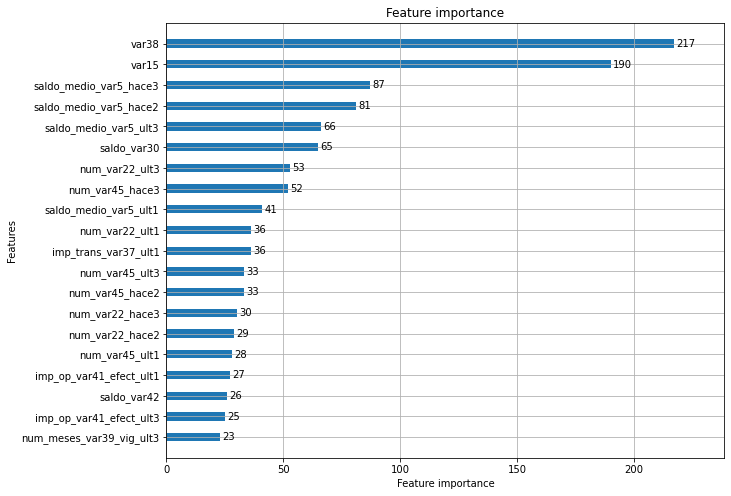

In [21]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(lgbm_clf, ax=ax, max_num_features=20,height=0.4)